In [39]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions
from preprocess import getdfs

In [40]:
def lcs_multiple(strings):
    if not strings:
        return ""

    # Function to find LCS of two strings
    def lcs_two(str1, str2):
        m, n = len(str1), len(str2)
        dp = [["" for _ in range(n + 1)] for _ in range(m + 1)]

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if str1[i - 1] == str2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + str1[i - 1]
                else:
                    dp[i][j] = max(dp[i - 1][j], dp[i][j - 1], key=len)

        return dp[m][n]

    # Start with the first string
    common_subseq = strings[0]

    # Iteratively find LCS with each string
    for string in strings[1:]:
        common_subseq = lcs_two(common_subseq, string)
        if not common_subseq:  # Early exit if no common subsequence
            return ""

    return common_subseq

# Example usage
strings = [x for x in train_df['input_str'].values]
result = lcs_multiple(strings)
print("Longest Common Subsequence:", result)

Longest Common Subsequence: 0004661596


In [41]:
def remove_exact_subsequence(strings, subseq):
    new_strings = []
    
    for string in strings:
        iter_subseq = iter(subseq)  # Create an iterator for the subsequence
        new_string = []
        subseq_char = next(iter_subseq, None)  # Get the first character from subsequence
        
        for char in string:
            if char == subseq_char:
                subseq_char = next(iter_subseq, None)  # Move to the next character in subsequence
            else:
                new_string.append(char)  # Append non-matching characters
        
        new_strings.append(''.join(new_string))  # Join the list into a string

    return new_strings

In [42]:
def reduce_strings(strings) :
    result = lcs_multiple(strings)
    while result != '' :
        strings = remove_exact_subsequence(strings, result)
        result = lcs_multiple(strings)
    return strings

In [46]:
train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

train_df['input_str'] = reduce_strings([x for x in train_df['input_str'].values])
valid_df['input_str'] = [ string[:15] for string in reduce_strings([x for x in valid_df['input_str'].values])]

In [47]:
len(train_df['input_str'][0]), len(valid_df['input_str'][0])

(15, 15)

In [49]:
num_feat = 15

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

## One Hot Encoding

In [50]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
from preprocess import one_hot_encode

train_df, valid_df, y_train, y_valid = one_hot_encode(train_df, valid_df)

In [51]:
y_valid.shape

(489,)

In [52]:
x_train = train_df.values
x_valid = valid_df.values

In [53]:
x_valid.shape

(489, 148)

In [54]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

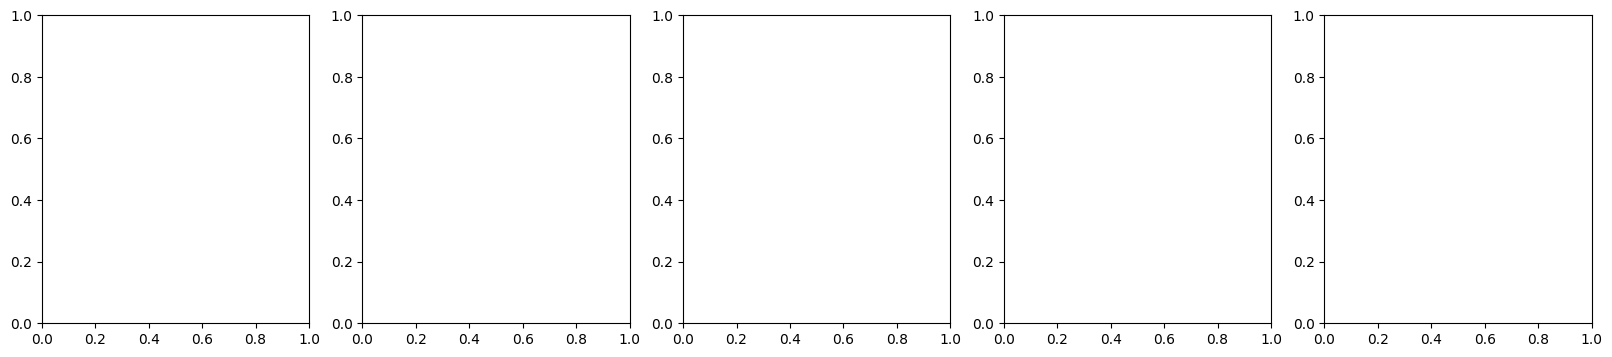

In [55]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

In [56]:
y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.55      0.65      0.59       252
     Class 1       0.54      0.43      0.48       237

    accuracy                           0.54       489
   macro avg       0.54      0.54      0.54       489
weighted avg       0.54      0.54      0.54       489

Accuracy is 0.5439672801635992
==========Random Forest==========


In [57]:

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.60      0.67      0.63       252
     Class 1       0.59      0.52      0.55       237

    accuracy                           0.60       489
   macro avg       0.59      0.59      0.59       489
weighted avg       0.59      0.60      0.59       489

Accuracy is 0.5950920245398773
==========XGBoost==========


In [58]:
y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])


==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.58      0.66      0.62       252
     Class 1       0.58      0.49      0.53       237

    accuracy                           0.58       489
   macro avg       0.58      0.58      0.57       489
weighted avg       0.58      0.58      0.58       489

Accuracy is 0.5787321063394683
==========Logistic Regression==========


In [59]:
y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.58      0.57      0.58       252
     Class 1       0.55      0.56      0.56       237

    accuracy                           0.57       489
   macro avg       0.57      0.57      0.57       489
weighted avg       0.57      0.57      0.57       489

Accuracy is 0.5664621676891616
==========MLP==========


In [60]:
y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'svc', ax = axes[4])

==========svc==========
              precision    recall  f1-score   support

     Class 0       0.49      0.50      0.50       252
     Class 1       0.46      0.44      0.45       237

    accuracy                           0.47       489
   macro avg       0.47      0.47      0.47       489
weighted avg       0.47      0.47      0.47       489

Accuracy is 0.47443762781186094
==========svc==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [61]:

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

==========Multinomial Naive Bayes==========
              precision    recall  f1-score   support

     Class 0       0.57      0.60      0.59       252
     Class 1       0.55      0.52      0.54       237

    accuracy                           0.56       489
   macro avg       0.56      0.56      0.56       489
weighted avg       0.56      0.56      0.56       489

Accuracy is 0.5623721881390593
==========Multinomial Naive Bayes==========


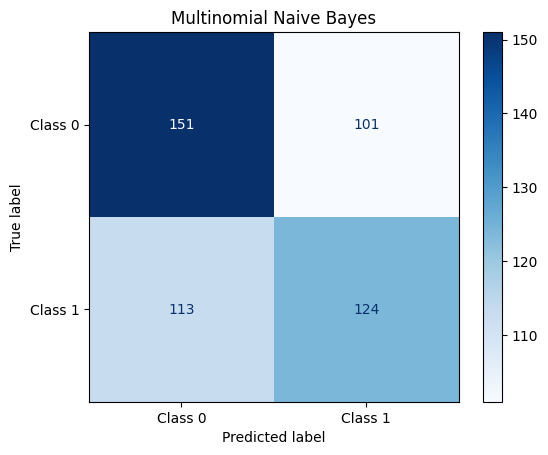

In [62]:
from models import predict_mnb

y_pred_mnb = predict_mnb(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mnb, 'Multinomial Naive Bayes')